In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/Users/shiyili/projects/kaggle/train.csv")
df = df[~df['target'].isnull()] 

print(df.shape)
print(f"Trading days: {df['date_id'].nunique()}")
print(f"Stocks: {df['stock_id'].nunique()}")

df['imbalance_size_with_flag'] = df['imbalance_size'] * df['imbalance_buy_sell_flag']
df['far_price'].fillna(0, inplace=True) # fillna with 0
df['near_price'].fillna(0, inplace=True) # fillna with 0

df.head()

(5237892, 17)
Trading days: 481
Stocks: 200


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,imbalance_size_with_flag
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.0,0.0,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0,3180602.69
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.0,0.0,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1,-166603.91
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.0,0.0,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2,-302879.87
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.0,0.0,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3,-11917682.27
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.0,0.0,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4,-447549.96


In [3]:
rank_cols = [ col for col in df.columns if col not in ['stock_id', 'imbalance_buy_sell_flag', 'time_id', 'row_id', 'seconds_in_bucket', 'date_id']]

rank_frame = df.groupby(['date_id', 'seconds_in_bucket'])[rank_cols].rank(pct=True).add_prefix('rank_')

In [5]:
df = pd.concat([df, rank_frame], axis=1)

In [6]:
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,rank_matched_size,rank_far_price,rank_near_price,rank_bid_price,rank_bid_size,rank_ask_price,rank_ask_size,rank_wap,rank_target,rank_imbalance_size_with_flag
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.000000,0.000000,0.999812,...,0.801047,0.502618,0.502618,0.507853,0.900524,0.073298,0.319372,0.502618,0.350785,0.790576
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.000000,0.000000,0.999896,...,0.130890,0.502618,0.502618,0.732984,0.178010,0.821990,0.565445,0.502618,0.225131,0.397906
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.000000,0.000000,0.999403,...,0.183246,0.502618,0.502618,0.209424,0.780105,0.570681,0.549738,0.502618,0.125654,0.350785
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.000000,0.000000,0.999999,...,0.853403,0.502618,0.502618,0.994764,0.130890,0.445026,0.994764,0.502618,0.303665,0.057592
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.000000,0.000000,0.999394,...,0.842932,0.502618,0.502618,0.198953,0.560209,0.047120,0.047120,0.502618,0.167539,0.329843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,...,0.615000,0.540000,0.555000,0.675000,0.305000,0.635000,0.775000,0.660000,0.740000,0.130000
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,...,0.240000,0.605000,0.655000,0.765000,0.735000,0.750000,0.430000,0.765000,0.055000,0.335000
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,...,0.365000,0.100000,0.095000,0.080000,0.170000,0.065000,0.600000,0.075000,0.660000,0.537500
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,...,0.890000,0.450000,0.440000,0.405000,0.635000,0.405000,0.960000,0.390000,0.425000,0.830000


In [13]:
df[['rank_far_price', 'rank_target']].corr()

,rank_far_price,rank_target
rank_far_price,1.000000,0.008106
rank_target,0.008106,1.000000


In [ ]:
corr_frame = df.groupby(['date_id', 'seconds_in_bucket'])[['rank_'+col for col in rank_cols]].corr()
corr_frame = corr_frame.reset_index()
corr_frame = corr_frame[corr_frame['level_2']=='rank_target']

corr_frame.drop(['level_2', 'rank_target'], axis=1, inplace=True)
corr_frame = corr_frame.fillna(0)


In [17]:
corr_frame

,date_id,seconds_in_bucket,rank_imbalance_size,rank_reference_price,rank_matched_size,rank_far_price,rank_near_price,rank_bid_price,rank_bid_size,rank_ask_price,rank_ask_size,rank_wap,rank_imbalance_size_with_flag
10,0,0,0.061980,0.238479,-0.053529,0.000000,0.000000,0.267896,-0.162206,0.311280,0.263115,0.000000,-0.060170
22,0,10,0.130159,-0.093557,0.016420,0.000000,0.000000,-0.085099,-0.049518,-0.021043,0.377778,-0.205930,-0.073588
34,0,20,0.160847,-0.103023,0.067406,0.000000,0.000000,-0.083678,0.065389,-0.096255,0.198203,-0.101830,-0.017093
46,0,30,0.190604,-0.032165,0.142895,0.000000,0.000000,-0.018762,0.057986,-0.094292,0.254292,-0.070339,0.045638
58,0,40,0.099906,-0.061901,0.095322,0.000000,0.000000,-0.082348,-0.075371,-0.080709,0.149504,-0.109891,0.099292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317410,480,500,-0.083383,0.041616,-0.061346,0.080289,0.061706,0.035708,0.079519,0.023652,0.133595,0.030013,0.121204
317422,480,510,-0.008976,-0.064083,-0.023530,-0.001475,-0.025047,-0.062360,-0.009783,-0.060490,0.058985,-0.060944,0.076256
317434,480,520,-0.056573,0.033183,-0.093118,0.036677,0.053567,0.035309,0.034372,0.051314,0.112857,0.043367,0.010698
317446,480,530,0.006282,0.072720,0.045725,0.088188,0.095026,0.075851,0.021463,0.078637,0.058449,0.076540,0.089879


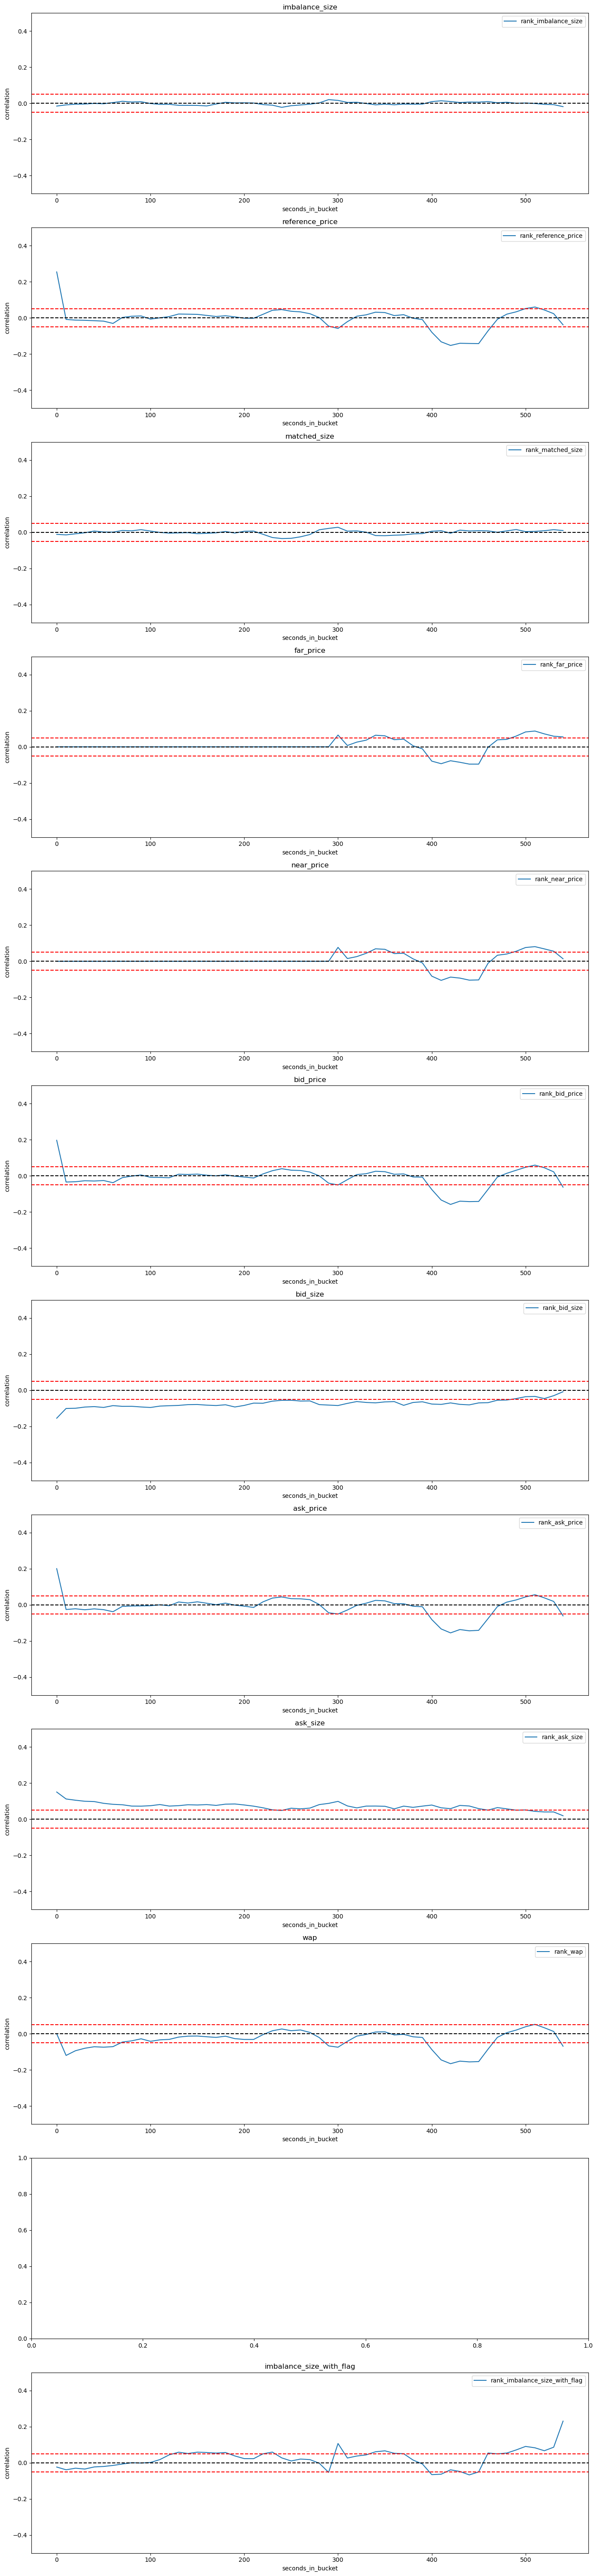

In [30]:
# for each rank_ feature, plot the timeseries of correlation value 
# x-axis: seconds_in_bucket
# y-axis: correlation value

n_rows = len(rank_cols) 
fig, axes = plt.subplots(n_rows, 1, figsize=(14, 5*n_rows))
for i, col in enumerate(rank_cols):
    if 'rank_' + col in corr_frame.columns:
        corr_medians['rank_' + col].plot(ax=axes[i], legend=True, title=col)
        axes[i].set_xlabel('seconds_in_bucket')
        axes[i].set_ylabel('correlation')
        axes[i].set_ylim(-.5, .5)
        axes[i].axhline(y=0, color='black', linestyle='--')
        axes[i].axhline(y=0.05, color='red', linestyle='--')
        axes[i].axhline(y=-0.05, color='red', linestyle='--')

plt.tight_layout()
plt.show()

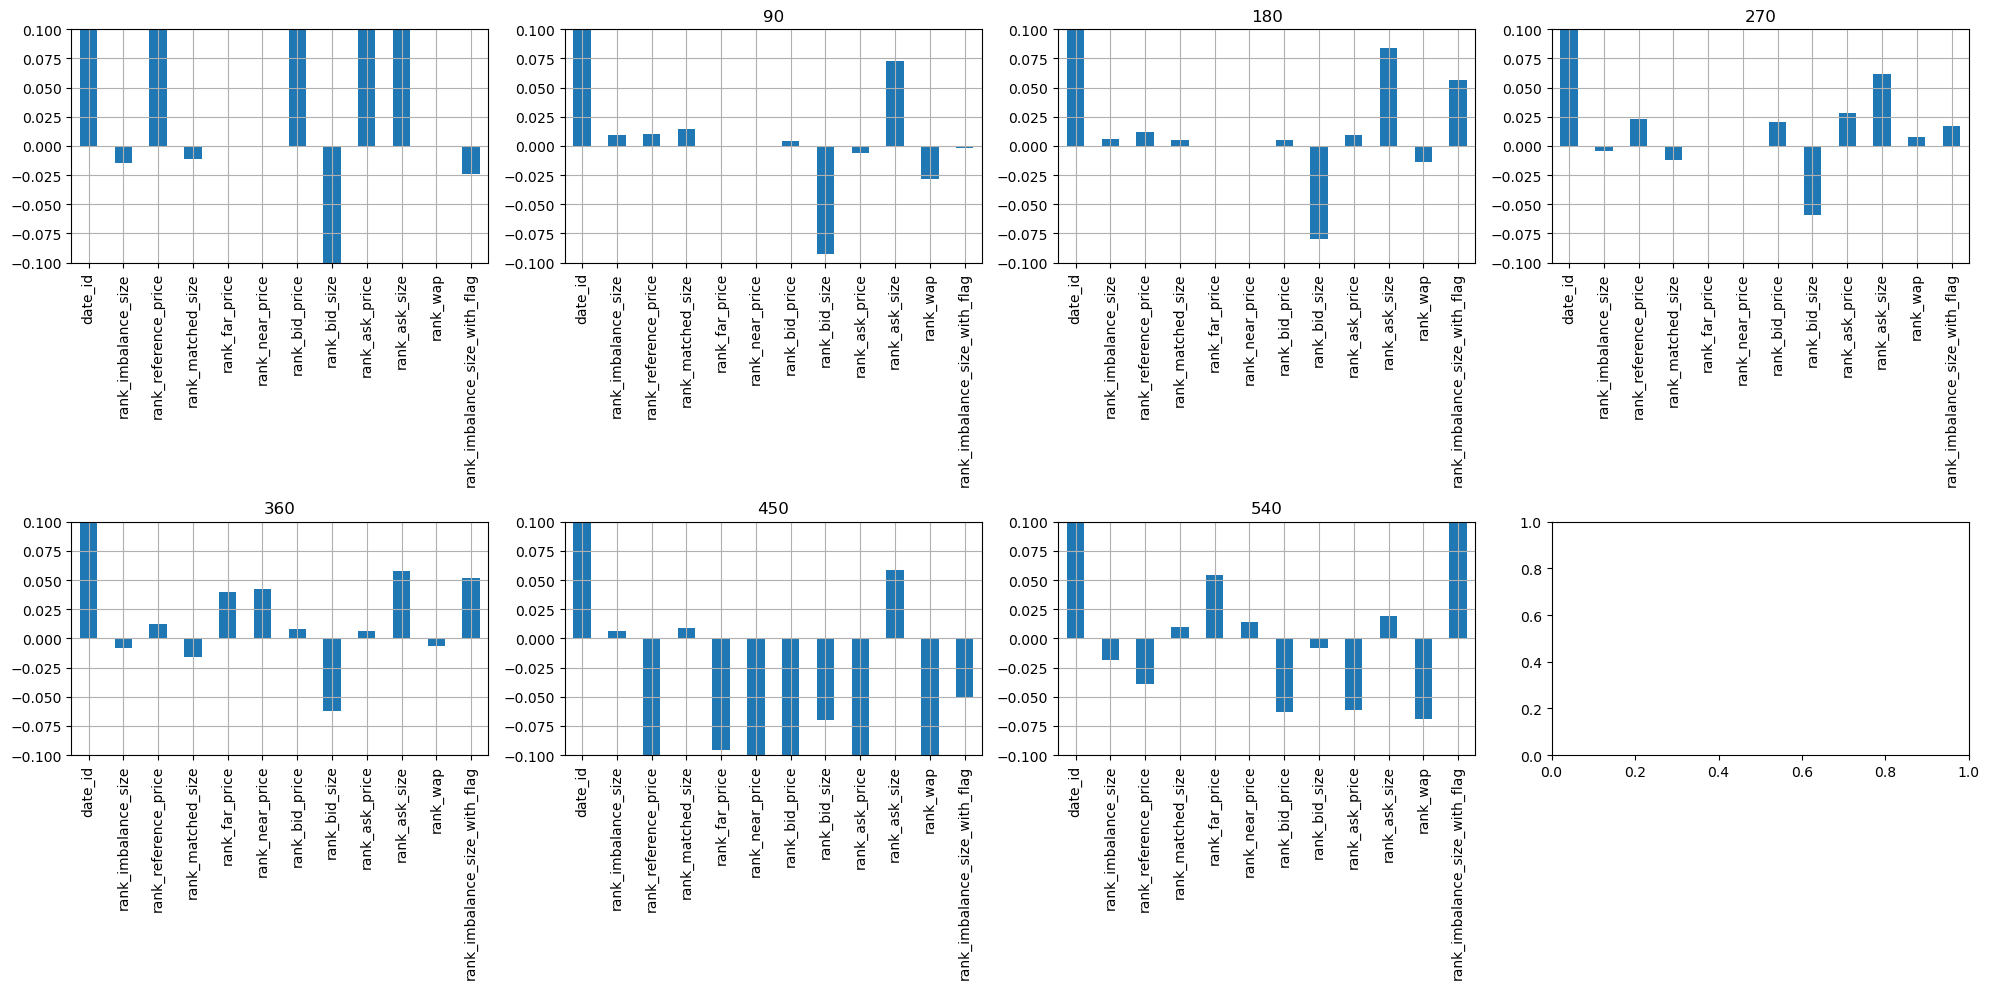

In [22]:
corr_medians = corr_frame.groupby('seconds_in_bucket').median()

corr_medians_9th = corr_medians.iloc[::9, :]

# Calculate the number of rows and columns for subplots
num_rows = (len(corr_medians_9th) + 3) // 4
num_cols = min(len(corr_medians_9th), 4)

# plot corr_medians using subplots.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
for i, (idx, row) in enumerate(corr_medians_9th.iterrows()):
    ax = axes[i//num_cols, i%num_cols]
    row.plot(kind='bar', ax=ax, title=idx)
    ax.set_ylim(-0.1, 0.1)
    ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
date_id = 100
second_id = 30 

df_section = df[(df['date_id'] == date_id) & (df['seconds_in_bucket'] == second_id)]

df_section['rank_target'] = df_section['target'].rank(pct=True)
df_section['rank_imb_size'] = df_section['imbalance_size'].rank(pct=True)
df_section['rank_imb_size_with_flag'] = df_section['imbalance_size_with_flag'].rank(pct=True)

In [ ]:
df_section[['stock_id', 'rank_target', 'rank_imb_size']]

In [ ]:
df_section[['rank_target', 'rank_imb_size']].corr()

In [ ]:
df_section[['rank_target', 'rank_imb_size_with_flag']].corr()

In [ ]:
df_section.plot(x='rank_imb_size', y='rank_target', kind='scatter', figsize=(5, 5))

In [ ]:
df_feat = df[['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'matched_size', 'reference_price', 'wap', 'target']]

df_feat['imbalance_size_with_flag'] = df_feat['imbalance_size'] * df_feat['imbalance_buy_sell_flag']

In [ ]:
cross_section_mean = df_feat.groupby(['date_id', 'seconds_in_bucket'])[['reference_price', 'wap', 'imbalance_size', 'matched_size', 'imbalance_size_with_flag']].mean().reset_index()

cross_section_mean['mean_reference_price'] = cross_section_mean['reference_price']
cross_section_mean['mean_wap'] = cross_section_mean['wap'] 
cross_section_mean['mean_imbalance_size'] = cross_section_mean['imbalance_size']
cross_section_mean['mean_matched_size'] = cross_section_mean['matched_size']
cross_section_mean['mean_imbalance_size_with_flag'] = cross_section_mean['imbalance_size_with_flag']

cross_section_mean.drop(['reference_price', 'wap'], axis=1, inplace=True)
cross_section_mean.drop(['imbalance_size', 'matched_size', 'imbalance_size_with_flag'], axis=1, inplace=True)

df_feat = df_feat.merge(cross_section_mean, on=['date_id', 'seconds_in_bucket'], how='left')

In [ ]:
stock_id = 78
date_id = 226

df_stock = df_feat[(df_feat['stock_id'] == stock_id) & (df_feat['date_id'] == date_id)]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax_right = ax.twinx()

# df_stock.plot(x='seconds_in_bucket', y=['reference_price', 'wap'], ax=ax, color=['blue', 'red'])
df_stock.plot(x='seconds_in_bucket', y=['imbalance_size_with_flag'], ax=ax, color=['blue', 'red'])
df_stock.plot(x='seconds_in_bucket', y=['target'], ax=ax_right, color=['k'], linestyle='--')

plt.show()

In [ ]:
# for each stock on each day, calculate the correlation between the target and the reference price
df_corr = df_feat.groupby(['stock_id', 'date_id'])[['target', 'reference_price', 'wap']].corr().reset_index()

# keep only the correlation between the target and the reference price
df_corr = df_corr[df_corr['level_2'] == 'target']

# rename the correlation column
df_corr.rename(columns={'reference_price': 'corr_reference_price'}, inplace=True)
df_corr.rename(columns={'wap': 'corr_wap'}, inplace=True)

# drop the level_2 and target columns
df_corr.drop(['level_2', 'target'], axis=1, inplace=True)

df_corr

In [ ]:
from scipy.signal import correlate

def get_correlation_lag(sr_a, sr_b):

    cross_corr = correlate(sr_a-np.mean(sr_a), sr_b-np.mean(sr_b)) / (np.std(sr_b) * np.std(sr_b) * len(sr_a))
    max_corr_idx = np.argmax(cross_corr) - (len(cross_corr)/2)

    return max_corr_idx 

In [ ]:
corr_lag_ref_price = df_feat.groupby(['stock_id', 'date_id'])[['target', 'reference_price']].apply(lambda x: get_correlation_lag(x['target'], x['reference_price'])).reset_index()

corr_lag_ref_price.groupby('stock_id')[0].mean().plot(kind='hist', bins=100, figsize=(10, 5))

In [ ]:
corr_lag_ref_price[0].median(), corr_lag_ref_price[0].std()

In [ ]:
corr_lag_ref_price = df_feat.groupby(['stock_id', 'date_id'])[['target', 'wap']].apply(lambda x: get_correlation_lag(x['target'], x['wap'])).reset_index()

corr_lag_ref_price.groupby('stock_id')[0].mean().plot(kind='hist', bins=100, figsize=(10, 5))

In [ ]:
corr_lag_ref_price[corr_lag_ref_price['stock_id'] == 76].plot( y=0, figsize=(10, 5), kind='hist', bins=100)

In [ ]:
stock_id = 23
date_id = 32

df_stock = df_feat[(df_feat['stock_id'] == stock_id) & (df_feat['date_id'] == date_id)]

series_1, series_2 = df_stock[['target', 'reference_price']].values.T

get_correlation_lag(series_1, series_2)


In [ ]:
stock_id = 23
date_id = 32

df_stock = df_feat[(df_feat['stock_id'] == stock_id) & (df_feat['date_id'] == date_id)]

series_1, series_2 = df_stock[['target', 'reference_price']].values.T

corr_series = correlate(series_1-np.mean(series_1), series_2-np.mean(series_2)) / (np.std(series_1) * np.std(series_2) * len(series_1))

plt.plot(corr_series)
plt.axvline(np.argmax(corr_series), color='red', linestyle='--')
plt.show()

In [ ]:
stock_id = 76
df_stock = df_corr[df_corr['stock_id'] == stock_id]

plt.hist( df_stock['corr_reference_price'], bins=100, label='corr_reference_price')
plt.hist( df_stock['corr_wap'], bins=100, label='corr_reference_price')
plt.show()

In [ ]:
# calculate the statistics of the correlation values
df_corr_stats = df_corr.groupby(['stock_id'])[['corr_reference_price', 'corr_wap']].describe().reset_index()

df_corr_stats

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

# df_corr_stats.plot(x='stock_id', y=[('corr_reference_price', 'mean')], ax=ax1, kind='scatter', color='blue')
# df_corr_stats.plot(x='stock_id', y=[('corr_wap', 'mean')], ax=ax2, kind='scatter', color='blue')
df_corr_stats[('corr_reference_price', 'mean')].plot(ax=ax1, kind='hist', bins=50, color='blue')
df_corr_stats[('corr_wap', 'mean')].plot(ax=ax2, kind='hist', bins=50, color='blue')
plt.show()